# Import Library

In [4]:
from pandas import read_csv
from numpy import argmax # array get max (get posisi nilai terbesar dalam array)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras import Model
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import plot_model

# Load Dataset

In [6]:
df = read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Preprocessing

## Drop data gender Other

In [9]:
df = df.drop(df[df['gender'] == 'Other'].index)

## Pengecekan Missing Value

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Pengecekan Duplikat Data

In [11]:
df.duplicated().sum()

3854

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(96128, 9)

## Unique Coloumn

In [13]:
{column : len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'gender': 2, 'smoking_history': 6}

In [14]:
print(df['gender'].unique())
print(df['smoking_history'].unique())

['Female' 'Male']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [15]:
df['gender'] = df['gender'].map({'Female':0, 'Male':1})
df['smoking_history'] = df['smoking_history'].map({'never':0, 'No Info':1, 'current':2, 'former':3, 'ever':4, 'not current':5})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  int64  
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  int64  
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [17]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


## Splitting Data

In [18]:
# Preparing Data

X = df.values[:, :-1]
y = df.values[:, -1]

# X, y = df.values[:, :-1], df.values[:, -1]


In [19]:
X[0:8]

array([[  0.  ,  80.  ,   0.  ,   1.  ,   0.  ,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  ,   0.  ,   1.  ,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  ,   0.  ,   0.  ,  27.32,   5.7 , 158.  ],
       [  0.  ,  36.  ,   0.  ,   0.  ,   2.  ,  23.45,   5.  , 155.  ],
       [  1.  ,  76.  ,   1.  ,   1.  ,   2.  ,  20.14,   4.8 , 155.  ],
       [  0.  ,  20.  ,   0.  ,   0.  ,   0.  ,  27.32,   6.6 ,  85.  ],
       [  0.  ,  44.  ,   0.  ,   0.  ,   0.  ,  19.31,   6.5 , 200.  ],
       [  0.  ,  79.  ,   0.  ,   0.  ,   1.  ,  23.86,   5.7 ,  85.  ]])

In [20]:
y

array([0., 0., 0., ..., 0., 0., 0.])

## Encode Label

In [21]:
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik

y = LabelEncoder().fit_transform(y) # encode label menjadi nilai numerik
y

array([0, 0, 0, ..., 0, 0, 0])

## Pengecekan Imbalance Data

In [22]:
np.unique(y, return_counts=True)

(array([0, 1]), array([87646,  8482]))

<Axes: >

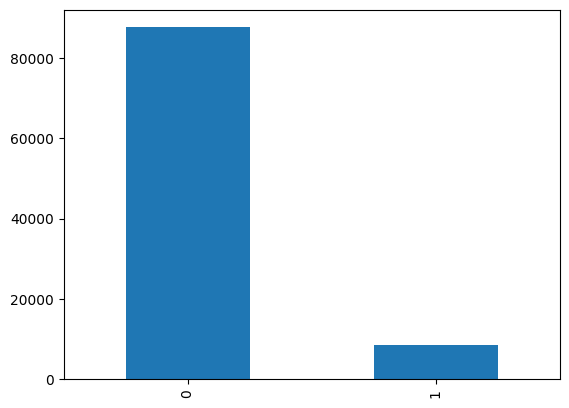

In [23]:
df["diabetes"].value_counts().plot(kind="bar")

## Imbalance Data Handling dgn ROS

In [24]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [25]:
print(X_res.shape)
print(y_res.shape)

(175292, 8)
(175292,)


In [26]:
np.unique(y_res, return_counts=True)

(array([0, 1]), array([87646, 87646]))

## Split Data Train and Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (140233, 8) (140233,)
Test set: (35059, 8) (35059,)


# Model Implementation

## RNN

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Assuming X_train and y_train are your data and labels

# Set the number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
accuracy_scores = []
n_features = X_train.shape[1]
n_timesteps = 1  # Set this to the appropriate value
# Define the RNN model
def create_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(10, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_rnn_model()

# Now you can call the summary method
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                190       
                                                                 
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


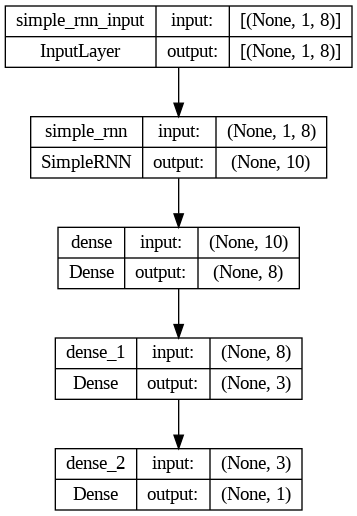

In [29]:
plot_model(model, 'model.png', show_shapes=True)

In [27]:
# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_rnn_model()

    X_train_fold = np.expand_dims(X_train_fold, axis=1)
    X_val_fold = np.expand_dims(X_val_fold, axis=1)

    history = model.fit(X_train_fold,
                        y_train_fold,
                        epochs=10,
                        batch_size=32,
                        verbose=1,
                        validation_data=(X_val_fold, y_val_fold))

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_binary = (y_val_pred >= 0.5).astype(int)
    accuracy = accuracy_score(y_val_fold, y_val_pred_binary)
    accuracy_scores.append(accuracy)

# Print average accuracy across folds
print(f'Average Accuracy: {np.mean(accuracy_scores)}')

Epoch 1/10
3506/3506 [==============================] - 20s 5ms/step - loss: 0.6499 - accuracy: 0.6466 - val_loss: 0.5656 - val_accuracy: 0.7217
Epoch 2/10
3506/3506 [==============================] - 11s 3ms/step - loss: 0.4842 - accuracy: 0.7783 - val_loss: 0.4385 - val_accuracy: 0.7735
Epoch 3/10
3506/3506 [==============================] - 12s 3ms/step - loss: 0.3153 - accuracy: 0.8699 - val_loss: 0.2645 - val_accuracy: 0.8899
Epoch 4/10
3506/3506 [==============================] - 14s 4ms/step - loss: 0.2781 - accuracy: 0.8780 - val_loss: 0.2556 - val_accuracy: 0.8864
Epoch 5/10
3506/3506 [==============================] - 12s 3ms/step - loss: 0.2706 - accuracy: 0.8784 - val_loss: 0.2488 - val_accuracy: 0.8895
Epoch 6/10
3506/3506 [==============================] - 12s 3ms/step - loss: 0.2673 - accuracy: 0.8797 - val_loss: 0.2503 - val_accuracy: 0.8901
Epoch 7/10
3506/3506 [==============================] - 13s 4ms/step - loss: 0.2679 - accuracy: 0.8785 - val_loss: 0.2597 - val_ac

In [33]:
y_val_pred = model.predict(X_val_fold)
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)

# Confusion Matrix
# cm = confusion_matrix(y_val_fold, y_val_pred_binary)
# sns.heatmap(cm,annot=True, fmt="d")

877/877 [==============================] - 3s 3ms/step


<Axes: >

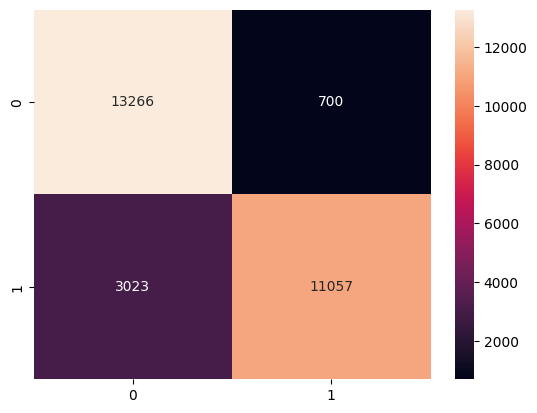

In [47]:
#Confusion Matrix
cm = confusion_matrix(y_val_fold, y_val_pred_binary)
sns.heatmap(cm,annot=True, fmt="d")

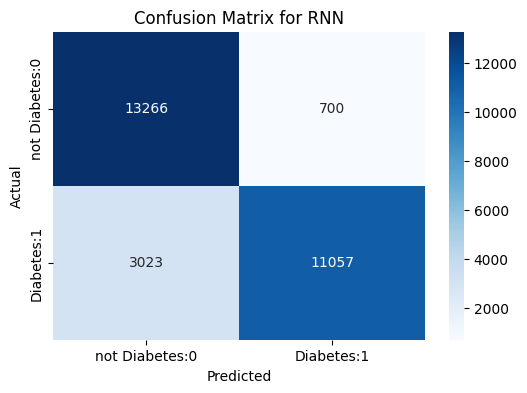

In [54]:
# Confusion matrix for DT
cm = confusion_matrix(y_val_fold, y_val_pred_binary)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['not Diabetes:0', 'Diabetes:1'], yticklabels=['not Diabetes:0', 'Diabetes:1'])
plt.title('Confusion Matrix for RNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
print(classification_report(y_val_fold, y_val_pred_binary))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     13966
           1       0.94      0.79      0.86     14080

    accuracy                           0.87     28046
   macro avg       0.88      0.87      0.87     28046
weighted avg       0.88      0.87      0.87     28046



### Evaluation

In [36]:
# Evaluate the Model
X_test_reshaped = np.expand_dims(X_test, axis=1)  # Add a new axis
loss, acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

1096/1096 - 3s - loss: 0.2786 - accuracy: 0.8683 - 3s/epoch - 2ms/step
Test Accuracy: 0.8682506680488586


In [42]:
n_features = 8

# Reshape new_data
new_data = np.array([0, 50.0, 0, 0, 1, 20.32, 4.5, 90])
new_data_reshaped = np.expand_dims(new_data, axis=0)
new_data_reshaped = np.expand_dims(new_data_reshaped, axis=1)  # Add a new axis

# Predict
y_pred = model.predict(new_data_reshaped)

# Get the predicted class
predicted_class = np.argmax(y_pred)

print(f'Predicted: {y_pred} (class = {predicted_class})')

1/1 [==============================] - 0s 33ms/step
Predicted: [[0.00195448]] (class = 0)


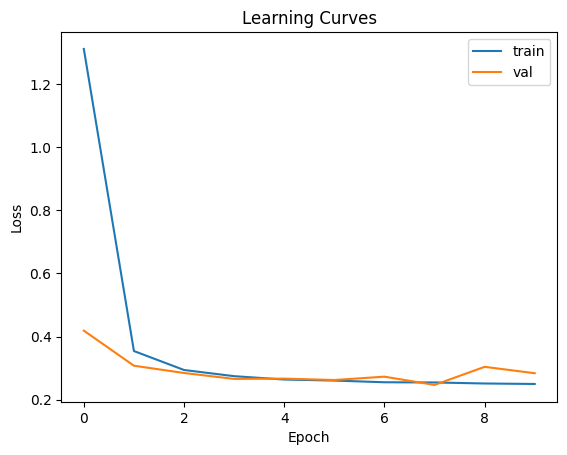

In [43]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [44]:
# save model to file
model.save('model.h5') # Hierarchical Data Format 5

### Simple Predict

In [45]:
from tensorflow.keras.models import load_model

# Load the model from file
model = load_model('model.h5')

# Make a prediction
new_data = np.array([0, 50.0, 0, 0, 1, 20.32, 4.5, 90]).reshape(1, 1, -1)
y_pred = model.predict(new_data)

# Print the predicted class
predicted_class = np.argmax(y_pred)
print(f'Predicted: {y_pred} (class = {predicted_class})')

1/1 [==============================] - 0s 184ms/step
Predicted: [[0.00195448]] (class = 0)
